In [66]:
import pandas as pd
from matplotlib import pyplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import mse,rmse
import statsmodels.graphics.tsaplots as tsa_plots
import seaborn as sns
import numpy as np
%matplotlib inline


from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 


import warnings
warnings.filterwarnings('ignore')

In [67]:
#Loading Data
df = pd.read_csv('Beds_Occupied.csv')
df

,collection_date,Total Inpatient Beds
0,15-06-2020,293
1,16-06-2020,295
2,17-06-2020,290
3,18-06-2020,291
4,19-06-2020,288
...,...,...
354,11-06-2021,312
355,12-06-2021,212
356,13-06-2021,299
357,14-06-2021,202


# Dataset details

In this We will Perform Business moments, Null values, Data types, Distribution plot and Boxplot.

### Business Moments

Finding the business moments of the data. **Mean, Mode, Median, Variance, Standard Deviation.**

In [68]:
np.mean(df)

Total Inpatient Beds    241.983287
dtype: float64

In [69]:
np.median(df['Total Inpatient Beds'])

235.0

In [70]:
np.var(df)

Total Inpatient Beds    835.008077
dtype: float64

In [71]:
np.std(df)

Total Inpatient Beds    28.896506
dtype: float64

In [72]:
from scipy import stats

stats.mode(df)

ModeResult(mode=array([['01-01-2021', 252]], dtype=object), count=array([[ 1, 18]]))

### Null values and Data Types.

To see whether the data has any null values and fixing it.

In [73]:
df.shape

(359, 2)

In [74]:
df.dtypes

collection_date         object
Total Inpatient Beds     int64
dtype: object

In [75]:
df.isnull().sum() #nullvalues

collection_date         0
Total Inpatient Beds    0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collection_date       359 non-null    object
 1   Total Inpatient Beds  359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [77]:
#Finds Min, Max and the 25th 50th and 75% percentile.

df.describe() 

,Total Inpatient Beds
count,359.000000
mean,241.983287
std,28.936836
min,190.000000
25%,219.000000
50%,235.000000
75%,259.000000
max,341.000000


### Distribution of the dataset.

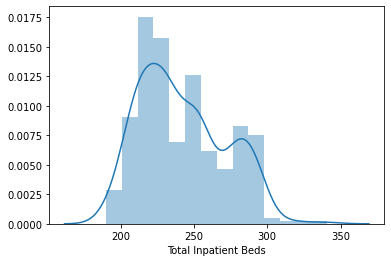

In [78]:
import seaborn as sns
sns.distplot(df['Total Inpatient Beds'])

**The data is not distrbuted normally.** We can later Normalize it.

### Boxplot for Total Inpatient Beds

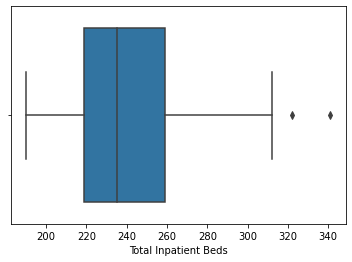

In [79]:
sns.boxplot(df['Total Inpatient Beds'])

**We have Outliers in our dataset.**

In [80]:
#Changing into datetime format

df['collection_date'] = pd.to_datetime(df['collection_date'],format='%d-%m-%Y')
df

,collection_date,Total Inpatient Beds
0,2020-06-15,293
1,2020-06-16,295
2,2020-06-17,290
3,2020-06-18,291
4,2020-06-19,288
...,...,...
354,2021-06-11,312
355,2021-06-12,212
356,2021-06-13,299
357,2021-06-14,202


# EDA
We will impute null values, fix indexes, extract information from date and, produce heatmaps, boxplots and decomposition plots, moving average, ACF and PACF plots finally Transform the data to fix distribution.

### Index Change

In [81]:
df.set_index('collection_date',inplace=True)

df_in = df
df_in

,Total Inpatient Beds
collection_date,
2020-06-15,293
2020-06-16,295
2020-06-17,290
2020-06-18,291
2020-06-19,288
...,...
2021-06-11,312
2021-06-12,212
2021-06-13,299


### Fixing Null Values

In [82]:
df_in = df.asfreq('d') #days

In [83]:
df_in.isnull().sum()

Total Inpatient Beds    7
dtype: int64

In [84]:
null_data = df_in[df_in.isnull().any(axis=1)] #viewing null_data

In [85]:
null_data

,Total Inpatient Beds
collection_date,
2020-11-26,NaN
2020-11-27,NaN
2020-11-28,NaN
2020-11-29,NaN
2021-05-14,NaN
2021-05-15,NaN
2021-05-16,NaN


In [86]:
temp = df_in.head(30)

In [87]:
span = 2
alpha = 2/(span+1)

temp['EWMA'] = temp['Total Inpatient Beds'].ewm(alpha=alpha,adjust=False).mean()
rmse(temp['EWMA'],temp['Total Inpatient Beds'])

7.113429834757771

In [88]:
span = 2
alpha = 2/(span+1)

df_in['EWMA'] = df_in['Total Inpatient Beds'].ewm(alpha=alpha,adjust=False).mean()

In [89]:
null_data = df_in[df_in.isnull().any(axis=1)]

null_data

,Total Inpatient Beds,EWMA
collection_date,,
2020-11-26,NaN,225.051136
2020-11-27,NaN,225.051136
2020-11-28,NaN,225.051136
2020-11-29,NaN,225.051136
2021-05-14,NaN,217.966768
2021-05-15,NaN,217.966768
2021-05-16,NaN,217.966768


In [90]:
df_in['Total Inpatient Beds'] = df_in['Total Inpatient Beds'].fillna(df_in.EWMA)

In [91]:
#NO NUll Data Found
null_data2 = df_in[df_in.isnull().any(axis=1)]

null_data2

,Total Inpatient Beds,EWMA
collection_date,,


In [92]:
#Finding available beds
#total beds are 900

df_in['Availability'] = 900-df_in['Total Inpatient Beds']
df_in

,Total Inpatient Beds,EWMA,Availability
collection_date,,,
2020-06-15,293.0,293.000000,607.0
2020-06-16,295.0,294.333333,605.0
2020-06-17,290.0,291.444444,610.0
2020-06-18,291.0,291.148148,609.0
2020-06-19,288.0,289.049383,612.0
...,...,...,...
2021-06-11,312.0,302.398007,588.0
2021-06-12,212.0,242.132669,688.0
2021-06-13,299.0,280.044223,601.0


### Extracting Year, Month, Day, Weekday

In [93]:
df_r =df_in.reset_index(drop=False)
df_r

,collection_date,Total Inpatient Beds,EWMA,Availability
0,2020-06-15,293.0,293.000000,607.0
1,2020-06-16,295.0,294.333333,605.0
2,2020-06-17,290.0,291.444444,610.0
3,2020-06-18,291.0,291.148148,609.0
4,2020-06-19,288.0,289.049383,612.0
...,...,...,...,...
361,2021-06-11,312.0,302.398007,588.0
362,2021-06-12,212.0,242.132669,688.0
363,2021-06-13,299.0,280.044223,601.0
364,2021-06-14,202.0,228.014741,698.0


In [94]:

df_r["month"] = df_r.collection_date.dt.strftime("%b") # month extraction
df_r["year"] = df_r.collection_date.dt.strftime("%Y") # year extraction

df_r["day"] = df_r.collection_date.dt.strftime("%d") # Day extraction
df_r["weekday"] = df_r.collection_date.dt.strftime("%A") # weekday extraction 


In [95]:
df_r.set_index('collection_date',inplace=True)

df_ind = df_r
df_ind

,Total Inpatient Beds,EWMA,Availability,month,year,day,weekday
collection_date,,,,,,,
2020-06-15,293.0,293.000000,607.0,Jun,2020,15,Monday
2020-06-16,295.0,294.333333,605.0,Jun,2020,16,Tuesday
2020-06-17,290.0,291.444444,610.0,Jun,2020,17,Wednesday
2020-06-18,291.0,291.148148,609.0,Jun,2020,18,Thursday
2020-06-19,288.0,289.049383,612.0,Jun,2020,19,Friday
...,...,...,...,...,...,...,...
2021-06-11,312.0,302.398007,588.0,Jun,2021,11,Friday
2021-06-12,212.0,242.132669,688.0,Jun,2021,12,Saturday
2021-06-13,299.0,280.044223,601.0,Jun,2021,13,Sunday


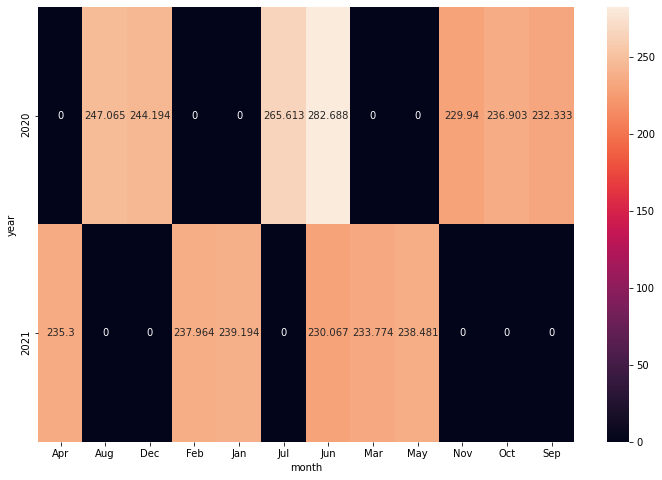

In [96]:
#Heatmap for each year Vs month

plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df_ind,values="Total Inpatient Beds",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
 

+ Total Inpatient Beds are more in the month of Jun and July for the year 2020
+ Total Inpatient Beds are more in the month of Feb to Jan for the year 2021

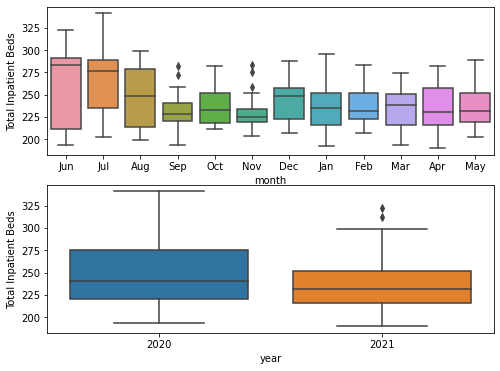

In [97]:
# Boxplot for Total Inpatient Beds in each month and year
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Total Inpatient Beds",data=df_ind)
plt.subplot(212)
sns.boxplot(x="year",y="Total Inpatient Beds",data=df_ind)

+ In Jun, july and Aug the Total Inpatient Beds were very high.
+ The Total Inpatient Beds for the year 2020 are higher than 2021.

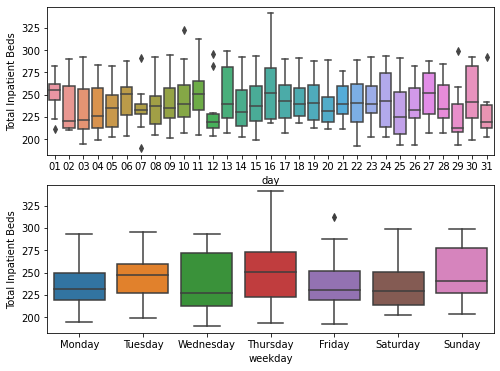

In [98]:
# Boxplot for Total Inpatient Beds in each day and weekday
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="day",y="Total Inpatient Beds",data=df_ind)
plt.subplot(212)
sns.boxplot(x="weekday",y="Total Inpatient Beds",data=df_ind)

+ Thursday has the highest number of Total Inpatient Beds

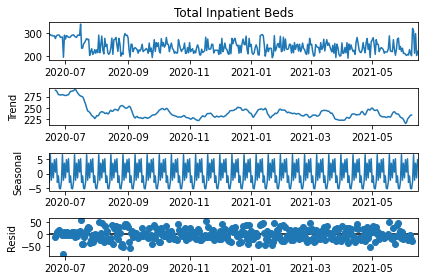

In [99]:
#Find Trend and Seasonality of for Total Inpatient Beds

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df_ind['Total Inpatient Beds'],freq=12)
decompose_ts_add.plot()
plt.show()

+ We have no **Trend** for the Year 2020-2021 but the data might have **Seasonality**. We can plot the Moving Average and see it that's true.

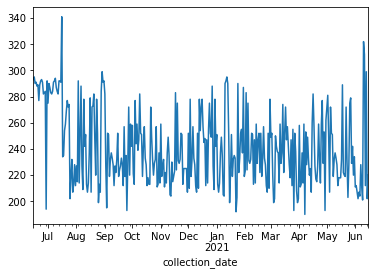

In [100]:
#plot for Total Inpatient Beds

df_ind['Total Inpatient Beds'].plot() 

# Moving Average

+ The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.
+ There are two main types of moving average that are used: **Centered and Trailing Moving Average.**
+ Trailing moving average only uses historical observations and is used on time series forecasting.
+ A center moving average can be used as a general method to remove trend and seasonal components from a time series.

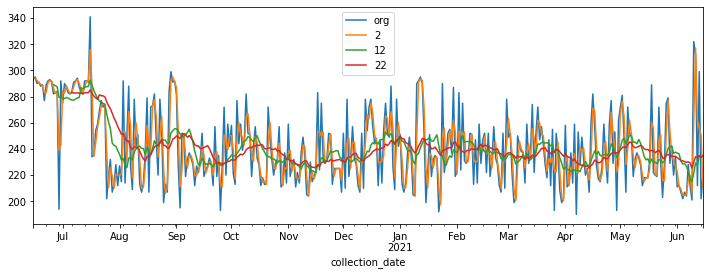

In [101]:
#plotting moving average for Total Inpatient Beds

plt.figure(figsize=(12,4))
df_ind['Total Inpatient Beds'].plot(label="org") #original
for i in range(2,24,10):
    df_ind['Total Inpatient Beds'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

We can see no Trend but the **might have Seasonality**. So we will plot it months wise and see the Rolling statsitics.

# Rolling Statistics

For 2, 4, 6 and 8 months Seperately for Total Inpatient Beds

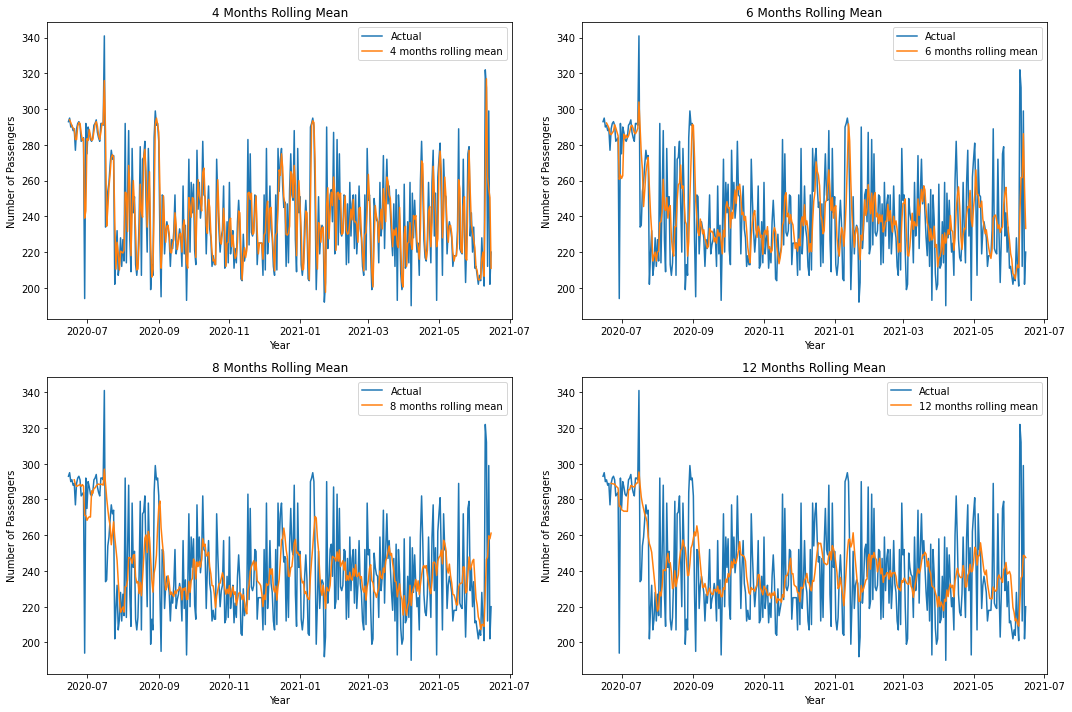

In [102]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(df_ind.index, df_ind['Total Inpatient Beds'],label='Actual')
axes[0][0].plot(df_ind.index, df_ind['Total Inpatient Beds'].rolling(window=2).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(df_ind.index, df_ind['Total Inpatient Beds'],label='Actual')
axes[0][1].plot(df_ind.index, df_ind['Total Inpatient Beds'].rolling(window=4).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(df_ind.index, df_ind['Total Inpatient Beds'],label='Actual')
axes[1][0].plot(df_ind.index, df_ind['Total Inpatient Beds'].rolling(window=6).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(df_ind.index, df_ind['Total Inpatient Beds'],label='Actual')
axes[1][1].plot(df_ind.index, df_ind['Total Inpatient Beds'].rolling(window=8).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

**Seasonality** <Br>

Let us see how many Total Inpatient Beds are there on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [103]:
# plotting Beds monthly for Total Inpatient Beds
monthly = pd.pivot_table(data=df_ind,values='Total Inpatient Beds',index='month',columns='year')
monthly = monthly.reindex(index=['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May'])
monthly

year,2020,2021
month,,
Jun,282.687500,230.066667
Jul,265.612903,NaN
Aug,247.064516,NaN
Sep,232.333333,NaN
Oct,236.903226,NaN
Nov,229.940151,NaN
Dec,244.193548,NaN
Jan,NaN,239.193548
Feb,NaN,237.964286


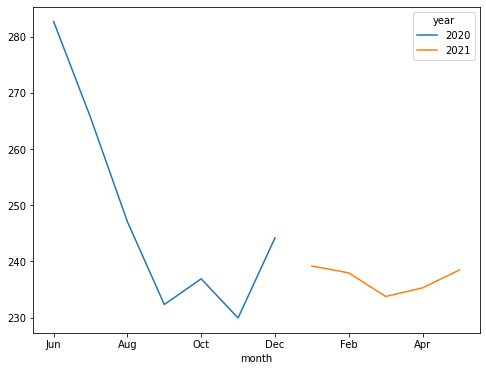

In [104]:
#monthly Beds
monthly.plot(figsize=(8,6))
plt.show()

In [105]:
#plotting passengers yearly
yearly = pd.pivot_table(data=df_ind,values='Total Inpatient Beds',index='year',columns='month')
yearly = yearly[['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May']]
yearly

month,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May
year,,,,,,,,,,,,
2020,282.687500,265.612903,247.064516,232.333333,236.903226,229.940151,244.193548,NaN,NaN,NaN,NaN,NaN
2021,230.066667,NaN,NaN,NaN,NaN,NaN,NaN,239.193548,237.964286,233.774194,235.3,238.480655


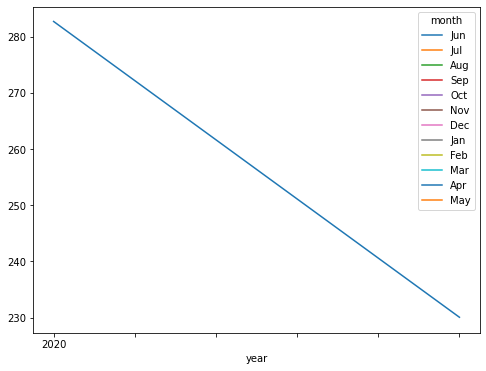

In [106]:
#plotting passengers yearly
yearly.plot(figsize=(8,6))
plt.show()

**THERE ARE NO SEASONAL VARIATION'S EITHER**

# Time series decomposition plot 

With Additive and multiplicative seasonality

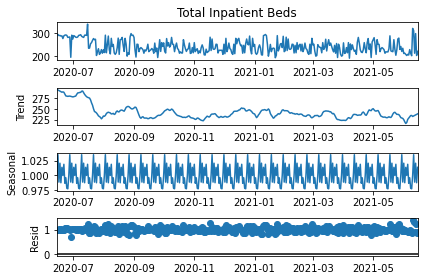

In [107]:
#multiplicative seasonality
decompose_ts_add = seasonal_decompose(df_ind['Total Inpatient Beds'],freq=12,model='multiplicative',extrapolate_trend=8)
decompose_ts_add.plot()
plt.show() 

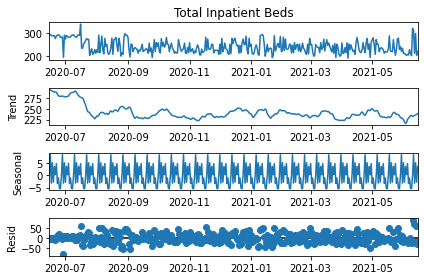

In [108]:
#additive seasonality
decompose_ts_add = seasonal_decompose(df_ind['Total Inpatient Beds'],freq=12,model='additive',extrapolate_trend=8)
decompose_ts_add.plot()
plt.show() 

# ACF plots and PACF plots

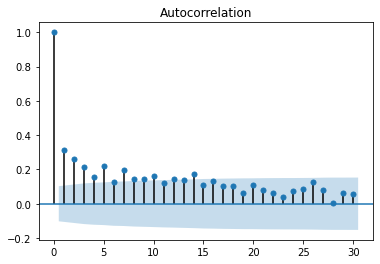

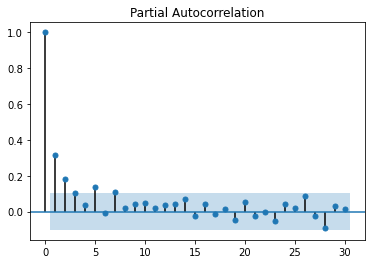

In [109]:
#for Total Inpatient Beds
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df_ind['Total Inpatient Beds'],lags=30)
tsa_plots.plot_pacf(df_ind['Total Inpatient Beds'],lags=30)
plt.show() 
 

### Lag 1 is Significant here.

# Transformation

In [110]:
from numpy import sqrt
from pandas import DataFrame

In [111]:
df1 = df_ind.drop(['month', 'year', 'day','weekday','EWMA','Availability'], axis=1)
df1

,Total Inpatient Beds
collection_date,
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
...,...
2021-06-11,312.0
2021-06-12,212.0
2021-06-13,299.0


# Plot Before Transformation

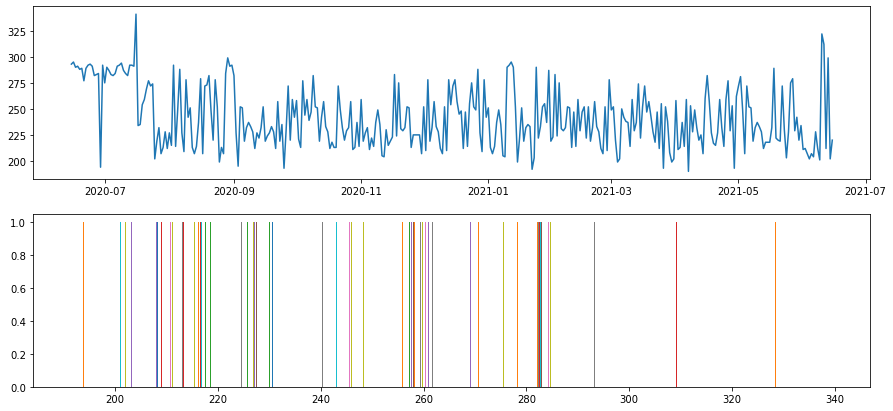

In [112]:
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(df1)
# histogram
plt.subplot(212)
plt.hist(df1)
plt.show()

# Square Root Transform
for Total Inpatient Beds

In [113]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [114]:
dataframe = DataFrame(df1.values)
dataframe.columns = ['Total Inpatient Beds']
dataframe['Total Inpatient Beds'] = sqrt(dataframe['Total Inpatient Beds'])

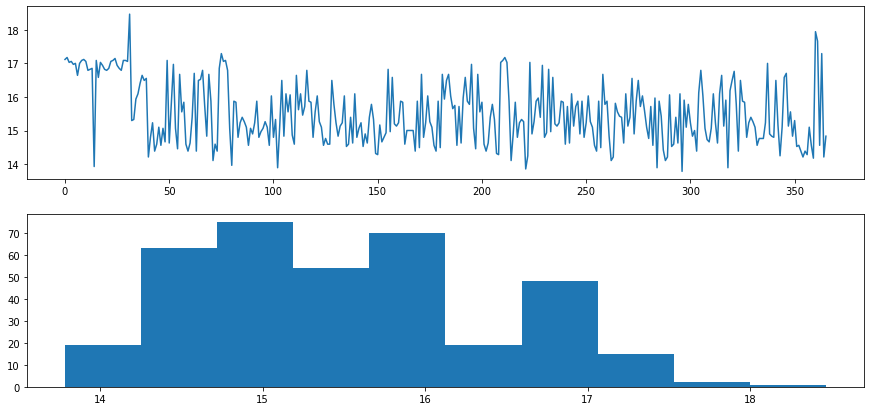

In [115]:
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Total Inpatient Beds'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Total Inpatient Beds'])
plt.show()

# Log Transform

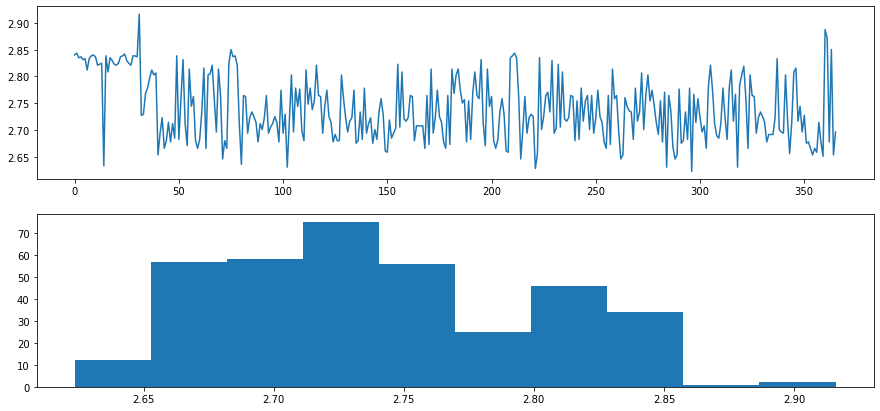

In [116]:
from numpy import log
dataframe = DataFrame(df1.values)
dataframe.columns = ['Total Inpatient Beds']
dataframe['Total Inpatient Beds'] = log(dataframe['Total Inpatient Beds'])

plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Total Inpatient Beds'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Total Inpatient Beds'])
plt.show()

# Model Building

Splitting dataset, Data Driven Models, Model Based Approaches

In [117]:
df_ind

,Total Inpatient Beds,EWMA,Availability,month,year,day,weekday
collection_date,,,,,,,
2020-06-15,293.0,293.000000,607.0,Jun,2020,15,Monday
2020-06-16,295.0,294.333333,605.0,Jun,2020,16,Tuesday
2020-06-17,290.0,291.444444,610.0,Jun,2020,17,Wednesday
2020-06-18,291.0,291.148148,609.0,Jun,2020,18,Thursday
2020-06-19,288.0,289.049383,612.0,Jun,2020,19,Friday
...,...,...,...,...,...,...,...
2021-06-11,312.0,302.398007,588.0,Jun,2021,11,Friday
2021-06-12,212.0,242.132669,688.0,Jun,2021,12,Saturday
2021-06-13,299.0,280.044223,601.0,Jun,2021,13,Sunday


In [118]:
# Splitting Train and Test 

Train = df_ind.head(len(df)-30)
Test = df_ind.tail(30) # testing on last 30 days

In [119]:
print(Train.shape,Test.shape)

(329, 7) (30, 7)


In [120]:
Train.columns

Index(['Total Inpatient Beds', 'EWMA', 'Availability', 'month', 'year', 'day',
       'weekday'],
      dtype='object')

# Data Driven Approaches

+ Evaluation Metric MAPE

+ Mean Absolute percentage error

In [121]:
# Creating a function to calculate the RMSE value for test data 
def RMSE(org,pred):
    temp = ((org-pred)**2)
    return (np.sqrt(np.mean(temp)))

In [122]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Total Inpatient Beds"]).fit()

#Predicting on Train set
predTr = ses_model.predict(start = Train.index[0], end = Train.index[-1]) 
pred_Tr_RMSE = RMSE(predTr, Train['Total Inpatient Beds']) 

#Predicting on Test set
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
pred_ses_RMSE = RMSE(pred_ses, Test['Total Inpatient Beds']) 

#Printing train and test results
print ('Train:',pred_Tr_RMSE , 'Test:', pred_ses_RMSE, )

Train: 25.472979233044448 Test: 35.3516658799836


In [123]:
# Holt method 
hw_model = Holt(Train["Total Inpatient Beds"]).fit()                       #fitting model

#Predicting on Train set
pred_hw_Tr = hw_model.predict(start = Train.index[0], end = Train.index[-1]) 
pred_Tr = RMSE(pred_hw_Tr, Train['Total Inpatient Beds']) 


#predicting on Test  
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])     
pred_hw_RMSE = RMSE(pred_hw, Test["Total Inpatient Beds"])                 #MAPE(predicted,original)


#Printing train and test results
print ('Train:',pred_Tr , 'Test:', pred_hw_RMSE, )

Train: 25.472979233069097 Test: 35.3516668834859


In [124]:
# Holts winter exponential smoothing with **additive seasonality and additive trend**
hwe_model_add_add = ExponentialSmoothing(Train["Total Inpatient Beds"], seasonal = "add", trend = "add", seasonal_periods = 4).fit()

#Predicting on Train set
pred_hwe_Tr = hwe_model_add_add.predict(start = Train.index[0], end = Train.index[-1]) 
pred_Tra = RMSE(pred_hwe_Tr, Train['Total Inpatient Beds']) 


#Predicting on Test set
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
pred_hwe_add_add_RMSE = RMSE(pred_hwe_add_add, Test["Total Inpatient Beds"]) 


#Printing train and test results
print ('Train:',pred_Tra , 'Test:', pred_hwe_add_add_RMSE, )

Train: 26.048236181992014 Test: 37.39302935588004


In [125]:
# Holts winter exponential smoothing with **multiplicative seasonality and additive trend**
hwe_model_mul_add = ExponentialSmoothing(Train["Total Inpatient Beds"], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()

#Predicting on Train set
pred_mul_add_Tr = hwe_model_mul_add.predict(start = Train.index[0], end = Train.index[-1]) 
pred_mul_add_Tr = RMSE(pred_mul_add_Tr, Train['Total Inpatient Beds']) 




pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1]) #Predicting on test
pred_hwe_mul_add_RMSE = RMSE(pred_hwe_mul_add, Test["Total Inpatient Beds"]) 


#Printing train and test results
print ('Train:',pred_mul_add_Tr , 'Test:', pred_hwe_mul_add_RMSE, )

Train: 25.35168134785809 Test: 35.18385569324185


In [126]:
#Comparing results 

data = {"MODEL":pd.Series(["pred_ses_RMSE","pred_hw_RMSE","pred_hwe_add_add_RMSE","pred_hwe_mul_add_RMSE"]),"Test_RMSE":pd.Series([pred_ses_RMSE,pred_hw_RMSE,pred_hwe_add_add_RMSE,pred_hwe_mul_add_RMSE]), "Train_RMSE":pd.Series([pred_Tr_RMSE, pred_Tr, pred_Tra, pred_mul_add_Tr])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['Test_RMSE'])

,MODEL,Test_RMSE,Train_RMSE
3,pred_hwe_mul_add_RMSE,35.183856,25.351681
0,pred_ses_RMSE,35.351666,25.472979
1,pred_hw_RMSE,35.351667,25.472979
2,pred_hwe_add_add_RMSE,37.393029,26.048236


##### Holts winter exponential smoothing with **multiplicative seasonality and additive trend has the least rmse value**

In [154]:
# Visualization of Forecasted values for Test data set using different methods 
plt.figure(figsize=(12, 5))
plt.plot(Train.index, Train["Total Inpatient Beds"], label='Train',color="black")
plt.plot(Test.index, Test["Total Inpatient Beds"], label='Test',color="blue")
#plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
#plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
#plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HW+add+add",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HW+mul+add",color="yellow")
plt.legend(loc='best')

KeyError: 'Total Inpatient Beds'

<Figure size 864x360 with 0 Axes>

In [128]:
# Final Model on 100% Data
final_model = ExponentialSmoothing(df_ind["Total Inpatient Beds"], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()
pred_final_model= final_model.predict(start = df_ind.index[0], end = df_ind.index[-1]) 
pred_final_model_RMSE = RMSE(pred_final_model, df_ind["Total Inpatient Beds"]) 
pred_final_model_RMSE


26.213444854731865

In [129]:
#Forecasting for next 30 time periods
forcastM = final_model.forecast(30)

In [130]:
#Total beds(900) - Total occupied_beds

np.subtract(900, forcastM) #available beds for next 30 days

2021-06-16    666.324621
2021-06-17    662.178035
2021-06-18    665.760815
2021-06-19    660.292400
2021-06-20    666.324621
2021-06-21    662.178035
2021-06-22    665.760815
2021-06-23    660.292400
2021-06-24    666.324621
2021-06-25    662.178035
2021-06-26    665.760816
2021-06-27    660.292400
2021-06-28    666.324621
2021-06-29    662.178035
2021-06-30    665.760816
2021-07-01    660.292400
2021-07-02    666.324621
2021-07-03    662.178035
2021-07-04    665.760816
2021-07-05    660.292400
2021-07-06    666.324621
2021-07-07    662.178035
2021-07-08    665.760816
2021-07-09    660.292400
2021-07-10    666.324621
2021-07-11    662.178035
2021-07-12    665.760816
2021-07-13    660.292400
2021-07-14    666.324621
2021-07-15    662.178035
Freq: D, dtype: float64

# Model Based Methods

In [131]:
df_re=df_ind.reset_index(drop=False)

In [132]:
df_re = df_re.rename(columns={'Total Inpatient Beds':'occupied_beds'}) #renaming
df_re

,collection_date,occupied_beds,EWMA,Availability,month,year,day,weekday
0,2020-06-15,293.0,293.000000,607.0,Jun,2020,15,Monday
1,2020-06-16,295.0,294.333333,605.0,Jun,2020,16,Tuesday
2,2020-06-17,290.0,291.444444,610.0,Jun,2020,17,Wednesday
3,2020-06-18,291.0,291.148148,609.0,Jun,2020,18,Thursday
4,2020-06-19,288.0,289.049383,612.0,Jun,2020,19,Friday
...,...,...,...,...,...,...,...,...
361,2021-06-11,312.0,302.398007,588.0,Jun,2021,11,Friday
362,2021-06-12,212.0,242.132669,688.0,Jun,2021,12,Saturday
363,2021-06-13,299.0,280.044223,601.0,Jun,2021,13,Sunday
364,2021-06-14,202.0,228.014741,698.0,Jun,2021,14,Monday


In [133]:
df_re["t"] = np.arange(0, 366) #shape

df_re["t_square"] = df_re["t"]*df_re["t"] #time
df_re["log_occupied_beds"] = np.log(df_re["occupied_beds"]) #log_value for Total Inpatient Beds(TIB)

### Getting Dummies for month column

In [134]:
Month_dummies = pd.DataFrame(pd.get_dummies(df_re['month'])) #dummies for month
df_dum = pd.concat([df_re, Month_dummies], axis = 1)
df_dum

,collection_date,occupied_beds,EWMA,Availability,month,year,day,weekday,t,t_square,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2020-06-15,293.0,293.000000,607.0,Jun,2020,15,Monday,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2020-06-16,295.0,294.333333,605.0,Jun,2020,16,Tuesday,1,1,...,0,0,0,0,1,0,0,0,0,0
2,2020-06-17,290.0,291.444444,610.0,Jun,2020,17,Wednesday,2,4,...,0,0,0,0,1,0,0,0,0,0
3,2020-06-18,291.0,291.148148,609.0,Jun,2020,18,Thursday,3,9,...,0,0,0,0,1,0,0,0,0,0
4,2020-06-19,288.0,289.049383,612.0,Jun,2020,19,Friday,4,16,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-06-11,312.0,302.398007,588.0,Jun,2021,11,Friday,361,130321,...,0,0,0,0,1,0,0,0,0,0
362,2021-06-12,212.0,242.132669,688.0,Jun,2021,12,Saturday,362,131044,...,0,0,0,0,1,0,0,0,0,0
363,2021-06-13,299.0,280.044223,601.0,Jun,2021,13,Sunday,363,131769,...,0,0,0,0,1,0,0,0,0,0
364,2021-06-14,202.0,228.014741,698.0,Jun,2021,14,Monday,364,132496,...,0,0,0,0,1,0,0,0,0,0


In [135]:
# Splitting Train and Test 

Train = df_dum.head(len(df)-30)
Test = df_dum.tail(30) # testing on last 30 days

In [136]:
print(Train.shape,Test.shape)

(329, 23) (30, 23)


In [137]:
print(Train.columns,'\n''\n', Test.columns)

Index(['collection_date', 'occupied_beds', 'EWMA', 'Availability', 'month',
       'year', 'day', 'weekday', 't', 't_square', 'log_occupied_beds', 'Apr',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object') 

 Index(['collection_date', 'occupied_beds', 'EWMA', 'Availability', 'month',
       'year', 'day', 'weekday', 't', 't_square', 'log_occupied_beds', 'Apr',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object')


In [138]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('occupied_beds ~ t', data=Train).fit()

#Train RMSE
pred_linear1 =  pd.Series(linear_model.predict(pd.DataFrame(Train['t'])))
rmse_linear1 = np.sqrt(np.mean((np.array(Train['occupied_beds']) - np.array(pred_linear1))**2))


#Test RMSE
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['occupied_beds']) - np.array(pred_linear))**2))
rmse_linear

print('Train:' ,rmse_linear1, 'Test:' , rmse_linear)

Train: 27.077404625872845 Test: 35.43378339183842


In [139]:
##################### Exponential ##############################

Exp = smf.ols('log_occupied_beds ~ t', data = Train).fit()

#Train RMSE
pred_Exp1 = pd.Series(Exp.predict(pd.DataFrame(Train['t'])))
rmse_Exp1 = np.sqrt(np.mean((np.array(Train['occupied_beds']) - np.array(np.exp(pred_Exp1)))**2))

#Test RMSE
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['occupied_beds']) - np.array(np.exp(pred_Exp)))**2))

print('Train:' ,rmse_Exp1, 'Test:' , rmse_Exp)

Train: 27.092406204385902 Test: 35.45872385176752


In [140]:
#################### Quadratic ###############################

Quad = smf.ols('occupied_beds ~ t+t_square', data=Train).fit()

#Train RMSE
pred_Quad1 = pd.Series(Quad.predict(Train[["t","t_square"]]))
rmse_Quad1 = np.sqrt(np.mean((np.array(Train['occupied_beds'])-np.array(pred_Quad1))**2))

#Test RMSE
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['occupied_beds'])-np.array(pred_Quad))**2))


print('Train:' ,rmse_Quad1, 'Test:' , rmse_Quad)

Train: 25.781681380843967 Test: 39.315014896944795


In [141]:
################### Additive seasonality ########################

add_sea = smf.ols('occupied_beds ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=Train).fit()

#Train RMSE

pred_add_sea1 = pd.Series(add_sea.predict(Train[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea1 = np.sqrt(np.mean((np.array(Train['occupied_beds'])-np.array(pred_add_sea1))**2))


#Test RMSE
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['occupied_beds'])-np.array(pred_add_sea))**2))

print('Train:' ,rmse_add_sea1, 'Test:' , rmse_add_sea)

Train: 24.974044780828397 Test: 50.917869001761396


In [142]:
################## Additive Seasonality Quadratic Trend ############################

add_sea_Quad = smf.ols('occupied_beds ~ t + t_square + Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()

#Train RMSE
pred_add_sea_quad1 = pd.Series(add_sea_Quad.predict(Train[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec', 't', 't_square']]))
rmse_add_sea_quad1 = np.sqrt(np.mean((np.array(Train['occupied_beds'])-np.array(pred_add_sea_quad1))**2))
 

#Test RMSE
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['occupied_beds'])-np.array(pred_add_sea_quad))**2))


print('Train:' ,rmse_add_sea_quad1, 'Test:' , rmse_add_sea_quad)

Train: 24.67056884666859 Test: 37.15175098131011


In [143]:
################## Additive Seasonality Linear Trend ############################

add_sea_lin = smf.ols('occupied_beds ~ t + Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=Train).fit()

#Train RMSE
pred_add_sea_lin1 = pd.Series(add_sea_lin.predict(Train[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec', 't']]))
rmse_add_sea_lin1 = np.sqrt(np.mean((np.array(Train['occupied_beds'])-np.array(pred_add_sea_lin1))**2))


#Test RMSE
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec', 't']]))
rmse_add_sea_lin = np.sqrt(np.mean((np.array(Test['occupied_beds'])-np.array(pred_add_sea_lin))**2))



print('Train:' ,rmse_add_sea_lin1, 'Test:' , rmse_add_sea_lin)

Train: 24.8702607138563 Test: 45.12005780768721


In [144]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_occupied_beds ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()

#Train RMSE
pred_Mult_sea1 = pd.Series(Mul_sea.predict(Train))
rmse_Mult_sea1 = np.sqrt(np.mean((np.array(Train['occupied_beds']) - np.array(np.exp(pred_Mult_sea1)))**2))


#Test RMSE
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['occupied_beds']) - np.array(np.exp(pred_Mult_sea)))**2))


print('Train:' ,rmse_Mult_sea1, 'Test:' , rmse_Mult_sea)

Train: 25.012125869438957 Test: 50.20674545595934


In [145]:
################## Multiplicative Seasonality Linear Trend  ###########

Mul_Add_sea = smf.ols('log_occupied_beds ~ t + Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()

#Train RMSE
pred_Mult_add_sea1 = pd.Series(Mul_Add_sea.predict(Train))
rmse_Mult_add_sea1 = np.sqrt(np.mean((np.array(Train['occupied_beds'])-np.array(np.exp(pred_Mult_add_sea1)))**2))


#Test RMSE
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['occupied_beds'])-np.array(np.exp(pred_Mult_add_sea)))**2))


print('Train:' ,rmse_Mult_add_sea1, 'Test:' , rmse_Mult_add_sea)

Train: 24.88718766201599 Test: 44.23600650458781


In [146]:
################## Multiplicative Seasonality Quadratic Trend  ###########

Mul_Add_sea_quad = smf.ols('log_occupied_beds ~ t + t_square + Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data = Train).fit()

#Train RMSE
pred_Mult_add_sea_quad1 = pd.Series(Mul_Add_sea_quad.predict(Train))
rmse_Mult_add_sea_quad1 = np.sqrt(np.mean((np.array(Train['occupied_beds'])-np.array(np.exp(pred_Mult_add_sea_quad1)))**2))


#Test RMSE
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['occupied_beds'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))

print('Train:' ,rmse_Mult_add_sea_quad1, 'Test:' , rmse_Mult_add_sea_quad)

Train: 24.664739657531165 Test: 37.67493247115858


# Values For All The Model Based Methods

In [147]:
#Creating dataframe of all model rmse values
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_add_sea_lin","rmse_Mult_sea","rmse_Mult_add_sea","rmse_Mult_add_sea_quad"]),"Test_RMSE":pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add_sea, rmse_add_sea_quad, rmse_add_sea_lin, rmse_Mult_sea, rmse_Mult_add_sea, rmse_Mult_add_sea_quad]),"Train_RMSE":pd.Series([rmse_linear1, rmse_Exp1, rmse_Quad1, rmse_add_sea1, rmse_add_sea_quad1, rmse_add_sea_lin1, rmse_Mult_sea1, rmse_Mult_add_sea1, rmse_Mult_add_sea_quad])}
table_rmse=pd.DataFrame(data)
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['Test_RMSE'])

,MODEL,Test_RMSE,Train_RMSE
0,rmse_linear,35.433783,27.077405
1,rmse_Exp,35.458724,27.092406
4,rmse_add_sea_quad,37.151751,24.670569
8,rmse_Mult_add_sea_quad,37.674932,37.674932
2,rmse_Quad,39.315015,25.781681
7,rmse_Mult_add_sea,44.236007,24.887188
5,rmse_add_sea_lin,45.120058,24.870261
6,rmse_Mult_sea,50.206745,25.012126
3,rmse_add_sea,50.917869,24.974045


**Linear Model has the least rmse score**

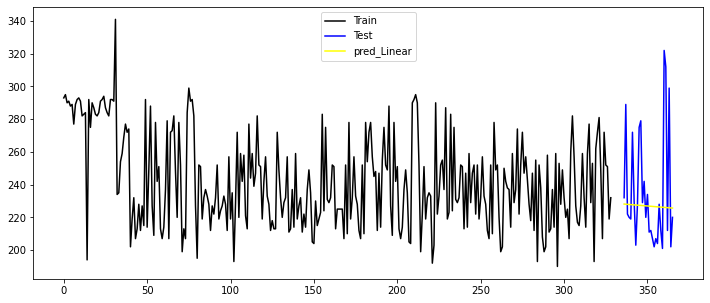

In [155]:
plt.figure(figsize=(12, 5))
plt.plot(Train.index, Train["occupied_beds"], label='Train',color="black")
plt.plot(Test.index, Test["occupied_beds"], label='Test',color="blue")
plt.plot(pred_linear.index,pred_linear,label="pred_Linear",color="yellow")
plt.legend(loc='best')

In [91]:
# predicting on complete dataset with Linear model

import statsmodels.formula.api as smf 

linear_model_full = smf.ols('occupied_beds ~ t', data=df_dum).fit()
pred_linear_full  = pd.Series(linear_model_full.predict(pd.DataFrame(df_dum['t'])))
rmse_linear_full  = np.sqrt(np.mean((np.array(df_dum['occupied_beds']) - np.array(pred_linear_full))**2))
rmse_linear_full

27.617421300406363

#### Predict for new time period

In [86]:
#creating new dataset
pred_new = pd.read_csv('pred_new.csv')

In [87]:
 #Changing into datetime format

pred_new['dates'] = pd.to_datetime(pred_new['dates'],format='%d-%m-%Y')
pred_new["month"] = pred_new.dates.dt.strftime("%b") # month extraction

In [88]:
Month_dummies = pd.DataFrame(pd.get_dummies(pred_new['month'])) #dummies for month
pred_dum = pd.concat([pred_new, Month_dummies], axis = 1)
pred_dum.head()

,dates,month,Jul,Jun
0,2021-06-16,Jun,0,1
1,2021-06-17,Jun,0,1
2,2021-06-18,Jun,0,1
3,2021-06-19,Jun,0,1
4,2021-06-20,Jun,0,1


In [89]:
pred_new["t"] = np.arange(0, 30) #shape
pred_new.to_csv('pred_ne.csv', header=True)

# predicting new data

In [92]:
pred_new2  = linear_model_full.predict(pred_ne)
pred_new2.head()  

NameError: name 'pred_ne' is not defined

In [93]:
#Total beds(900) - Total occupied_beds

np.subtract(900, pred_new2) #available beds for next 30 days

NameError: name 'pred_new2' is not defined

In [ ]:
#making a dataframe with predicted values

#df["forecasted_beds"] = pd.Series(pred_linear_full)


# ARIMA Model

In [94]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA

In [95]:
df_re.set_index('collection_date',inplace=True)

In [96]:
arima = df_re.iloc[:,0]
arima.head()

collection_date
2020-06-15    293.0
2020-06-16    295.0
2020-06-17    290.0
2020-06-18    291.0
2020-06-19    288.0
Name: occupied_beds, dtype: float64

In [97]:
len(arima)  

366

# Separate out a Validation dataset

In [98]:
split_point = len(arima) - 30
dataset, validation = arima[0:split_point], arima[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 336, Validation 30


# Persistence/ Base model

In [99]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.1)
train, test = X[train_size:], X[0:train_size] 

print('train:',len(train) , 'test:',len(test))

train: 303 test: 33


In [100]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    
# report performance
rmse = sqrt(mean_squared_error(test, predictions)) #prediction on test (last 33 days)
print('RMSE: %.3f' % rmse)

>Predicted=217.967, Expected=293.000
>Predicted=293.000, Expected=295.000
>Predicted=295.000, Expected=290.000
>Predicted=290.000, Expected=291.000
>Predicted=291.000, Expected=288.000
>Predicted=288.000, Expected=289.000
>Predicted=289.000, Expected=277.000
>Predicted=277.000, Expected=289.000
>Predicted=289.000, Expected=292.000
>Predicted=292.000, Expected=293.000
>Predicted=293.000, Expected=291.000
>Predicted=291.000, Expected=282.000
>Predicted=282.000, Expected=283.000
>Predicted=283.000, Expected=284.000
>Predicted=284.000, Expected=194.000
>Predicted=194.000, Expected=292.000
>Predicted=292.000, Expected=275.000
>Predicted=275.000, Expected=290.000
>Predicted=290.000, Expected=287.000
>Predicted=287.000, Expected=283.000
>Predicted=283.000, Expected=282.000
>Predicted=282.000, Expected=284.000
>Predicted=284.000, Expected=291.000
>Predicted=291.000, Expected=292.000
>Predicted=292.000, Expected=294.000
>Predicted=294.000, Expected=287.000
>Predicted=287.000, Expected=284.000
>

# ARIMA Hyperparameters

In [101]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.1)
    train, test = X[train_size:], X[0:train_size]
    history = [x for x in train]
    #print(len(train),len(test))
    
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Grid search for p,d,q values

In [102]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE= %.3f' % (best_cfg, best_score))

In [103]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=49.908
ARIMA(0, 0, 1) RMSE=44.368
ARIMA(0, 0, 2) RMSE=40.493
ARIMA(0, 0, 3) RMSE=39.336
ARIMA(0, 0, 4) RMSE=39.650
ARIMA(0, 1, 0) RMSE=34.196
ARIMA(0, 1, 1) RMSE=34.137
ARIMA(0, 1, 2) RMSE=34.661
ARIMA(0, 1, 3) RMSE=34.421
ARIMA(0, 1, 4) RMSE=34.717
ARIMA(0, 2, 0) RMSE=54.551
ARIMA(0, 2, 1) RMSE=34.314
ARIMA(0, 2, 2) RMSE=31.800
ARIMA(0, 2, 3) RMSE=31.939
ARIMA(0, 2, 4) RMSE=30.070
ARIMA(1, 0, 0) RMSE=41.608
ARIMA(1, 0, 1) RMSE=36.300
ARIMA(1, 1, 0) RMSE=29.840
ARIMA(1, 1, 1) RMSE=34.206
ARIMA(1, 1, 2) RMSE=34.262
ARIMA(1, 1, 3) RMSE=34.561
ARIMA(1, 2, 0) RMSE=40.828
ARIMA(2, 0, 0) RMSE=38.092
ARIMA(2, 1, 0) RMSE=29.470
ARIMA(2, 1, 1) RMSE=33.916
ARIMA(2, 1, 2) RMSE=33.457
ARIMA(2, 1, 4) RMSE=33.892
ARIMA(2, 2, 0) RMSE=36.079
ARIMA(3, 0, 0) RMSE=37.656
ARIMA(3, 1, 0) RMSE=29.696
ARIMA(3, 1, 1) RMSE=33.999
ARIMA(3, 1, 3) RMSE=34.605
ARIMA(3, 2, 0) RMSE=34.998
ARIMA(4, 0, 0) RMSE=38.002
ARIMA(4, 0, 1) RMSE=35.792
ARIMA(4, 0, 2) RMSE=35.641
ARIMA(4, 0, 3) RMSE=35.532
A

+ P = 2 #AR
+ d = 1 #differentiation
+ q = 0 #MA

**These are the best parameters for our Arima model**

# Building model based on the optimized values

In [104]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [105]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values #335
X = X.astype('float32')

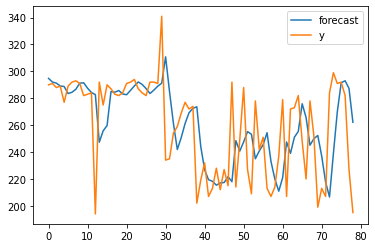

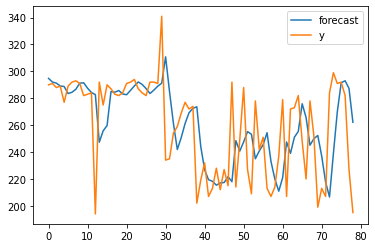

In [106]:
# fit model
model = ARIMA(X, order=(2,1,0)) #updating
model_fit = model.fit()
forecast=model_fit.forecast(steps=30)[0] #forecasting on next 30 beds (for dataset)
model_fit.plot_predict(1, 79)

In [107]:
# Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast)) #validation on 33 days
rmse

40.18034767207614

**ARIMA model has the highest rmse score.**

# Combine train and test data and build final model

In [108]:
# prepare data
X = df_re['occupied_beds'].values
X = X.astype('float32')

In [109]:
len(X)

366

In [110]:
#model fitting
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()

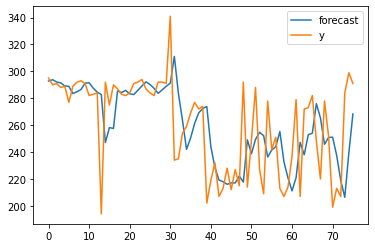

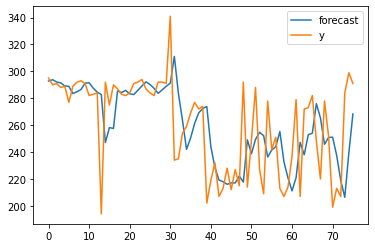

In [111]:
#prediction on future 30 days
forecast= model_fit.forecast(steps=30)[0]
model_fit.plot_predict(1,76)

In [112]:
forecast

array([235.84619213, 221.04942899, 225.13067847, 226.45775537,
       224.18667144, 224.82671861, 224.72910016, 224.26330947,
       224.22195221, 224.02961614, 223.80950965, 223.64788631,
       223.45908485, 223.27025964, 223.08899414, 222.90322549,
       222.71804437, 222.53376298, 222.34878174, 222.1639682 ,
       221.97924892, 221.79442685, 221.60963993, 221.42486058,
       221.24006695, 221.05527974, 220.87049267, 220.68570373,
       220.50091587, 220.31612788])

In [113]:
#Total beds(900) - Total occupied_beds

np.subtract(900, forecast) #available beds for next 30 days

array([664.15380787, 678.95057101, 674.86932153, 673.54224463,
       675.81332856, 675.17328139, 675.27089984, 675.73669053,
       675.77804779, 675.97038386, 676.19049035, 676.35211369,
       676.54091515, 676.72974036, 676.91100586, 677.09677451,
       677.28195563, 677.46623702, 677.65121826, 677.8360318 ,
       678.02075108, 678.20557315, 678.39036007, 678.57513942,
       678.75993305, 678.94472026, 679.12950733, 679.31429627,
       679.49908413, 679.68387212])